In [13]:
# Airbnb Data Preparation and Cleaning Workshop
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean

In [14]:
print("Current Working Directory:", os.getcwd()) 

# Define file paths for training and testing data
file_path_train = os.path.join("../..", "artifacts", "reco_sys_train_data.csv")  
file_path_test = os.path.join("../..", "artifacts", "reco_sys_test_data.csv")  

# Print the paths to verify
print("Training Data Path:", file_path_train)
print("Testing Data Path:", file_path_test)

df_train = pd.read_csv(file_path_train)
df_test = pd.read_csv(file_path_test)

Current Working Directory: /Users/carlychinsekyi/Downloads/OpenAYEye/notebook/reco_system
Training Data Path: ../../artifacts/reco_sys_train_data.csv
Testing Data Path: ../../artifacts/reco_sys_test_data.csv


In [15]:
# data transformation train Meteor
input_file = "clean_train_reco.csv" # input CSV file
output_file = "clean_train_reco_meteor.csv" # output CSV file

In [16]:
df_train = pd.read_csv(input_file)

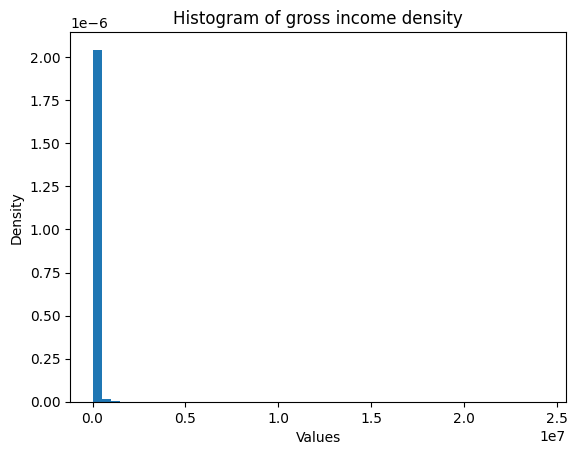

In [17]:
# meteor dropped on north region of spain 

# overall decreaseof 20% of economy immediately

# histogram of gross income
plt.hist(df_train['gross_income'],bins = 50, density=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram of gross income density')
plt.show() 

# results is an exponential
np.random.seed(1000)

In [18]:
# decrease of 10% of overall income
lambda_inv = mean(df_train['gross_income'])*(2/10)

gross_income_dec = np.random.exponential(scale=lambda_inv, size = len(df_train))
final_income = []
for i in range(0,len(df_train)):
    inc = df_train['gross_income'].iloc[i]-gross_income_dec[i]
    if inc<0:
        final_income.append(0)
    else:
        final_income.append(inc)
df_train['gross_income'] = final_income



In [19]:
#overall 90% died for those who lived in the north. the 10% are those who were not in the region when the meteor struck
new_deceased = []
for i in range(0,len(df_train)):
    if df_train['deceased_index_S'].iloc[i] == 0 and df_train['region_NORTH'].iloc[i] == 1:
        if(np.random.rand()<(0.9)):
            new_deceased.append(1)
        else:
            new_deceased.append(0)
    else:
       new_deceased.append(0)

df_train['deceased_index_s'] = new_deceased

In [20]:
df_train.to_csv(output_file, index=False)

In [21]:
# data transformation test Covid
input_file = "clean_test_reco.csv" # input CSV file
output_file = "clean_test_reco_meteor.csv" # output CSV file

In [22]:
df_test = pd.read_csv(input_file)

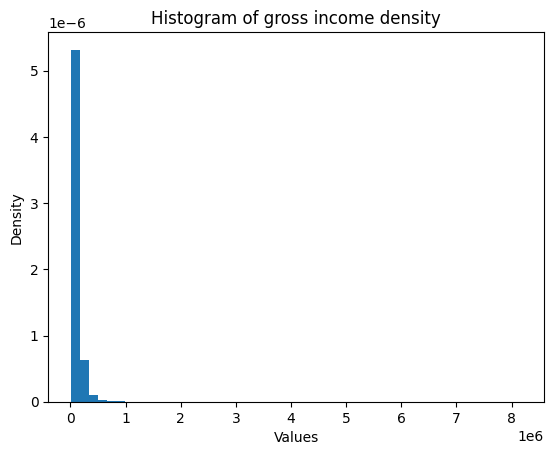

In [23]:
#meteor dropped on north region of spain 

#overall decreaseof 20% of economy immediately

#histogram of gross income
plt.hist(df_test['gross_income'],bins = 50, density=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram of gross income density')
plt.show() 

#results is an exponential
np.random.seed(1000)

In [24]:
# decrease of 10% of overall income
lambda_inv = mean(df_test['gross_income'])*(2/10)

gross_income_dec = np.random.exponential(scale=lambda_inv, size = len(df_test))
final_income = []
for i in range(0,len(df_test)):
    inc = df_test['gross_income'].iloc[i]-gross_income_dec[i]
    if inc<0:
        final_income.append(0)
    else:
        final_income.append(inc)
df_test['gross_income'] = final_income

In [25]:
#overall 90% died for those who lived in the north. the 10% are those who were not in the region when the meteor struck
new_deceased = []
for i in range(0,len(df_test)):
    if df_test['deceased_index_S'].iloc[i] == 0 and df_test['region_NORTH'].iloc[i] == 1:
        if(np.random.rand()<(0.9)):
            new_deceased.append(1)
        else:
            new_deceased.append(0)
    else:
       new_deceased.append(0)

df_test['deceased_index_s'] = new_deceased

In [26]:
df_test.to_csv("clean_test_reco_meteor.csv", index=False)